### Imports

In [1]:
import functools as ft
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import yaml

from bagpy import bagreader

### Constants

In [2]:
# bag_dir = '../data/pb_rosbag/Linoleum/kwadrat/2023-01-16-17-42-29'
bag_dir = '../data/pb_rosbag/Linoleum/kwadrat/Linoleum1'

### Load data from csv

In [3]:
bag_file_path = bag_dir + '.bag'
b = bagreader(bag_file_path)

[INFO]  Data folder ../data/pb_rosbag/Linoleum/kwadrat/Linoleum1 already exists. Not creating.


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/Servo_data,kin_odom_msg/Measurements,1800,20.755558
1,/cmd_vel,geometry_msgs/Twist,2927,36.024255
2,/filter/quaternion,geometry_msgs/QuaternionStamped,8891,259.275762
3,/ground,std_msgs/String,2,0.011330
4,/imu/acceleration,geometry_msgs/Vector3Stamped,8891,258.182512
5,/imu/angular_velocity,geometry_msgs/Vector3Stamped,8891,257.461420
6,/imu/data,sensor_msgs/Imu,8891,260.823581
7,/imu/mag,geometry_msgs/Vector3Stamped,8891,269.107147
8,/imu/time_ref,sensor_msgs/TimeReference,8891,255.469850
9,/odom,nav_msgs/Odometry,4501,56.812218


In [5]:
topic_data = {file[:-4]: pd.read_csv(os.path.join(bag_dir, file)) for file in os.listdir(bag_dir)}

### Topics visualization

In [6]:
cmd_vel = topic_data['cmd_vel']
cmd_vel

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,0.001107
2,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,0.004158
3,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,0.007541
4,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,0.010057
...,...,...,...,...,...,...,...
2922,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,-0.026249
2923,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,-0.014948
2924,1.674052e+09,0.000000,0.0,0.0,0.0,0.0,-0.004342
2925,1.674052e+09,-0.064077,0.0,0.0,0.0,0.0,0.005049


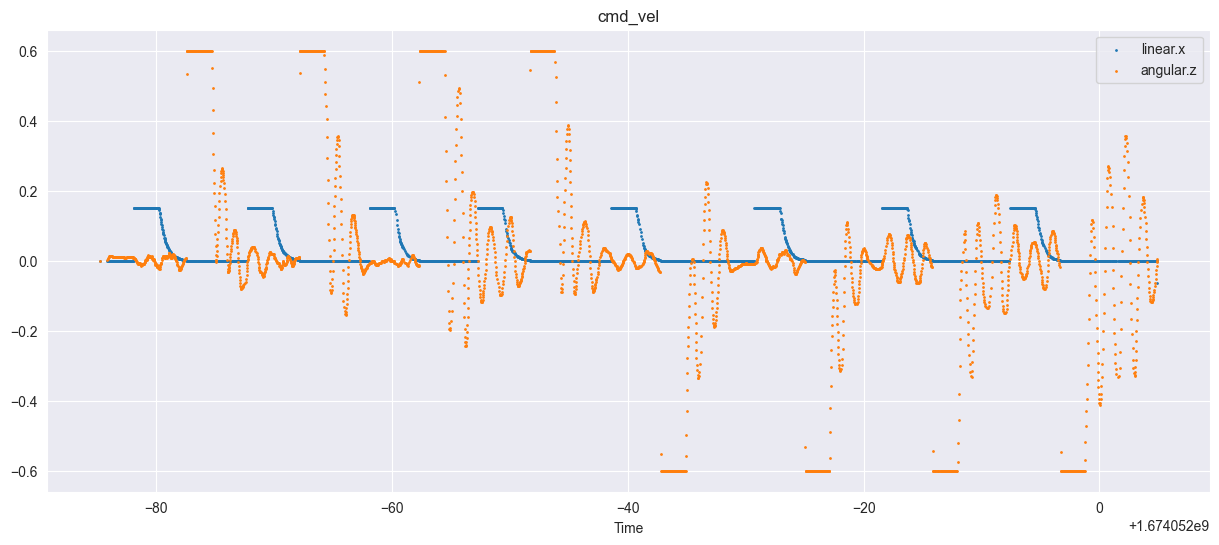

In [7]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['linear.x', 'angular.z']
for col in cols:
    plt.scatter(x=cmd_vel['Time'], y=cmd_vel[col], s=1, label=col)
plt.title('cmd_vel')
plt.xlabel('Time')
plt.legend()
plt.show()

In [8]:
imu_acceleration = topic_data['imu-acceleration']
imu_acceleration

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.674052e+09,381209,1674051912,653753374,imu_link,-0.140595,0.170108,10.008654
1,1.674052e+09,381210,1674051912,653769197,imu_link,-0.152499,0.175647,10.009459
2,1.674052e+09,381211,1674051912,653777255,imu_link,-0.177458,0.169949,10.008457
3,1.674052e+09,381212,1674051912,653785114,imu_link,-0.128934,0.172992,9.997029
4,1.674052e+09,381213,1674051912,653792711,imu_link,-0.150698,0.164563,10.013125
...,...,...,...,...,...,...,...,...
8886,1.674052e+09,390095,1674052002,608831663,imu_link,-0.096040,0.196862,10.020647
8887,1.674052e+09,390096,1674052002,608840117,imu_link,-0.103095,0.199216,9.936904
8888,1.674052e+09,390097,1674052002,608848058,imu_link,-0.036814,0.262275,10.026518
8889,1.674052e+09,390098,1674052002,608855802,imu_link,-0.138413,0.239997,9.920788


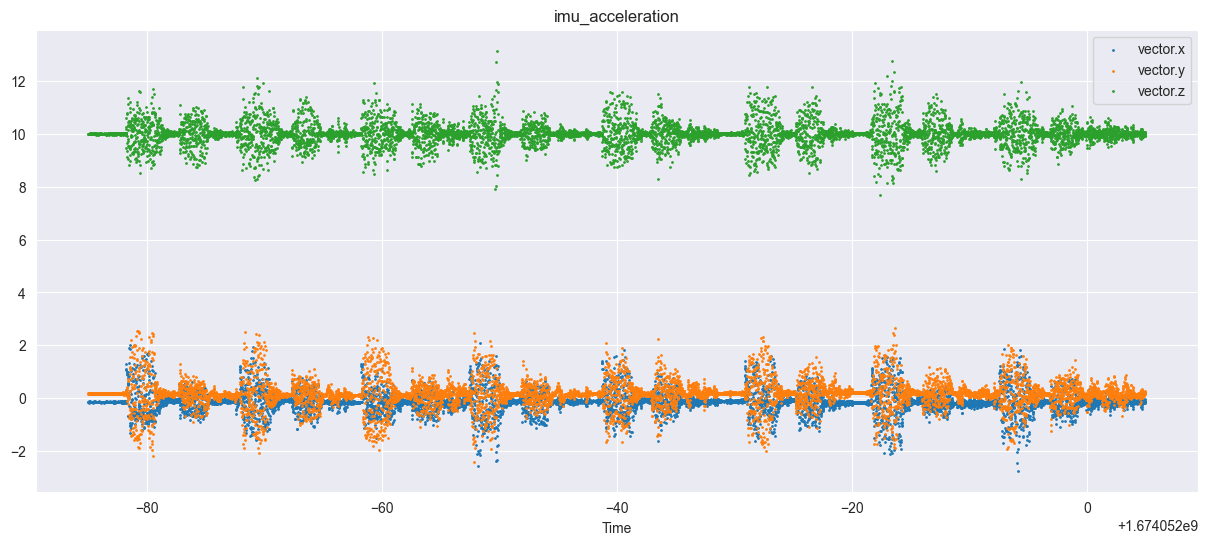

In [9]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_acceleration['Time'], y=imu_acceleration[col], s=1, label=col)
plt.title('imu_acceleration')
plt.xlabel('Time')
plt.legend()
plt.show()

In [10]:
imu_angular_velocity = topic_data['imu-angular_velocity']
imu_angular_velocity

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.674052e+09,381209,1674051912,653753374,imu_link,0.011280,0.001624,-0.012872
1,1.674052e+09,381210,1674051912,653769197,imu_link,0.011843,0.000147,-0.012319
2,1.674052e+09,381211,1674051912,653777255,imu_link,0.011911,0.000857,-0.014249
3,1.674052e+09,381212,1674051912,653785114,imu_link,0.012661,0.000971,-0.014456
4,1.674052e+09,381213,1674051912,653792711,imu_link,0.011737,0.000154,-0.012100
...,...,...,...,...,...,...,...,...
8886,1.674052e+09,390095,1674052002,608831663,imu_link,0.012135,-0.004850,-0.062013
8887,1.674052e+09,390096,1674052002,608840117,imu_link,0.010301,-0.002779,-0.056489
8888,1.674052e+09,390097,1674052002,608848058,imu_link,0.011994,-0.000540,-0.053453
8889,1.674052e+09,390098,1674052002,608855802,imu_link,0.011776,0.001342,-0.043778


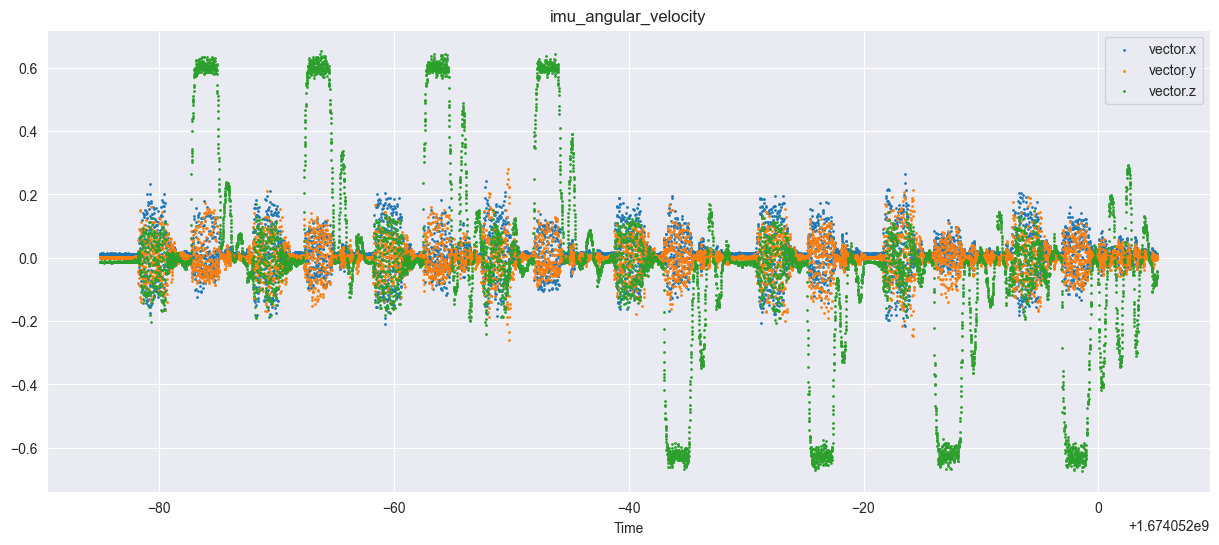

In [11]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_angular_velocity['Time'], y=imu_angular_velocity[col], s=1, label=col)
plt.title('imu_angular_velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

In [12]:
odom = topic_data['odom']
odom

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.674052e+09,196288,1674051912,611926836,odom,base_link,-0.007318,-0.001186,0.0,0.0,...,-0.001341,0.999999,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.674052e+09,196289,1674051912,631906805,odom,base_link,-0.007318,-0.001186,0.0,0.0,...,-0.001341,0.999999,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.674052e+09,196290,1674051912,651949028,odom,base_link,-0.007318,-0.001186,0.0,0.0,...,-0.001341,0.999999,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.674052e+09,196291,1674051912,671950125,odom,base_link,-0.007318,-0.001186,0.0,0.0,...,-0.001341,0.999999,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.674052e+09,196292,1674051912,691950412,odom,base_link,-0.007318,-0.001186,0.0,0.0,...,-0.001341,0.999999,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,0.0,0.0,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,1.674052e+09,200784,1674052002,531948372,odom,base_link,-0.107042,0.025547,0.0,0.0,...,-0.014971,0.999888,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.000594,0.0,0.0,0.0,0.0,-0.045728,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4497,1.674052e+09,200785,1674052002,551948775,odom,base_link,-0.107054,0.025548,0.0,0.0,...,-0.015428,0.999881,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.000594,0.0,0.0,0.0,0.0,-0.045728,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4498,1.674052e+09,200786,1674052002,571956215,odom,base_link,-0.107065,0.025548,0.0,0.0,...,-0.015885,0.999874,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.000594,0.0,0.0,0.0,0.0,-0.045728,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4499,1.674052e+09,200787,1674052002,591952550,odom,base_link,-0.107085,0.025549,0.0,0.0,...,-0.016268,0.999868,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.000989,0.0,0.0,0.0,0.0,-0.038313,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


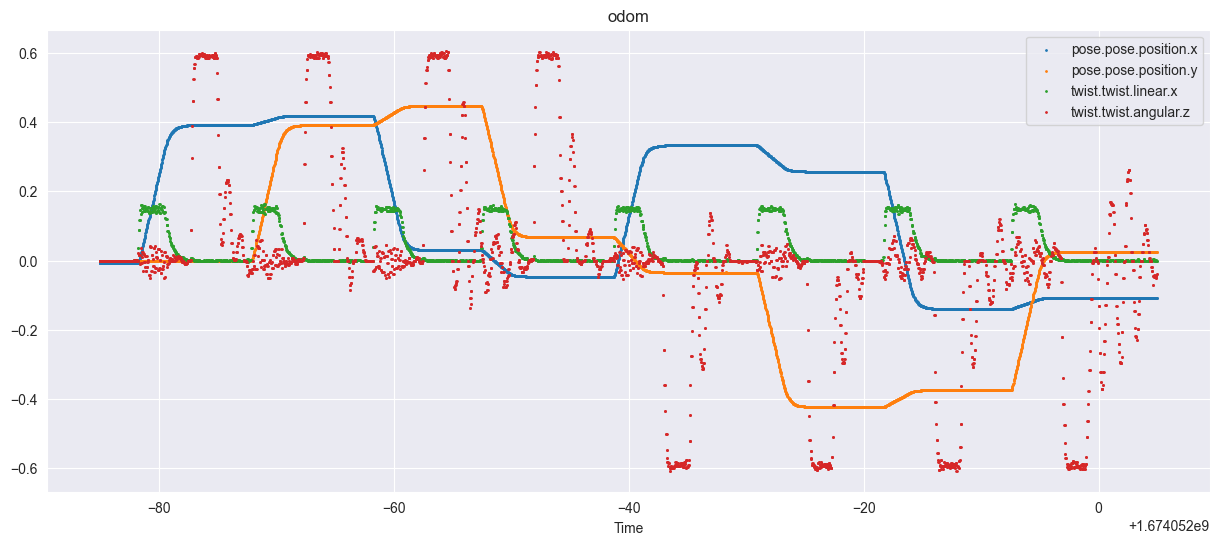

In [13]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['pose.pose.position.x', 'pose.pose.position.y', 'twist.twist.linear.x', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=odom['Time'], y=odom[col], s=1, label=col)
plt.title('odom')
plt.xlabel('Time')
plt.legend()
plt.show()

### Refine data

In [14]:
imu_data = topic_data['imu-data']

In [15]:
cmd_vel_refined = cmd_vel.drop(columns=['linear.y', 'linear.z', 'angular.x', 'angular.y'])
imu_acceleration_refined = imu_data[['Time', 'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z']]
imu_angular_velocity_refined = imu_data[['Time', 'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z']]
odom_refined = odom.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'child_frame_id',
                                  'pose.covariance', 'twist.covariance',
                                  'pose.pose.position.z',
                                  'pose.pose.orientation.x', 'pose.pose.orientation.y', 'pose.pose.orientation.z', 'pose.pose.orientation.w',
                                  'twist.twist.linear.y', 'twist.twist.linear.z', 'twist.twist.angular.x', 'twist.twist.angular.y'])

In [16]:
dataframes = [cmd_vel_refined, imu_acceleration_refined, imu_angular_velocity_refined, odom_refined]
dataframe = ft.reduce(lambda left, right: pd.merge(left, right, how='outer', on='Time'), dataframes)
dataframe.ffill(inplace=True)
dataframe.bfill(inplace=True)
dataframe['Time'] -= dataframe['Time'].min()
dataframe.set_index('Time', inplace=True)
dataframe

,linear.x,angular.z,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,angular_velocity.x,angular_velocity.y,angular_velocity.z,pose.pose.position.x,pose.pose.position.y,twist.twist.linear.x,twist.twist.angular.z
Time,,,,,,,,,,,,
0.000000,0.0,0.0,-0.140595,0.170108,10.008654,0.011280,0.001624,-0.012872,-0.007318,-0.001186,0.000000,0.000000
0.000009,0.0,0.0,-0.140595,0.170108,10.008654,0.011280,0.001624,-0.012872,-0.007318,-0.001186,0.000000,0.000000
0.000017,0.0,0.0,-0.140595,0.170108,10.008654,0.011280,0.001624,-0.012872,-0.007318,-0.001186,0.000000,0.000000
0.004680,0.0,0.0,-0.140595,0.170108,10.008654,0.011280,0.001624,-0.012872,-0.007318,-0.001186,0.000000,0.000000
0.007577,0.0,0.0,-0.152499,0.175647,10.009459,0.011843,0.000147,-0.012319,-0.007318,-0.001186,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
89.958727,0.0,0.0,-0.096040,0.196862,10.020647,0.012135,-0.004850,-0.062013,-0.107105,0.025549,-0.000989,-0.038313
89.959392,0.0,0.0,-0.103095,0.199216,9.936904,0.010301,-0.002779,-0.056489,-0.107105,0.025549,-0.000989,-0.038313
89.961381,0.0,0.0,-0.036814,0.262275,10.026518,0.011994,-0.000540,-0.053453,-0.107105,0.025549,-0.000989,-0.038313


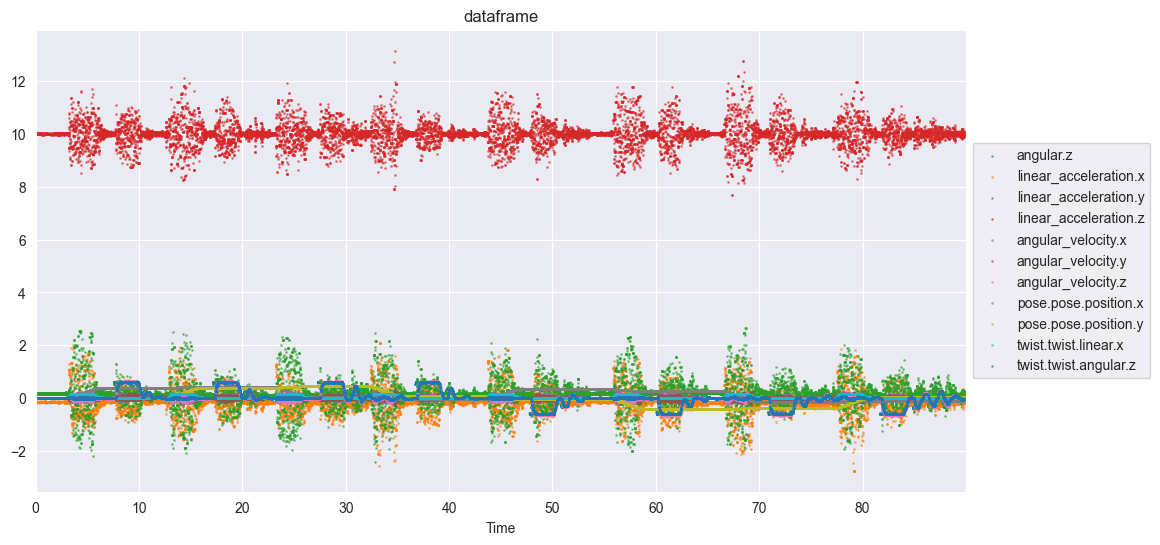

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe.columns[1:]:
    ax.scatter(x=dataframe.index, y=dataframe[column], s=1, alpha=0.5, label=column)
ax.set_title('dataframe')
ax.set_xlabel('Time')
ax.set_xlim(dataframe.index[0], dataframe.index[-1])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Correlation matrix

(12.5, -0.5)

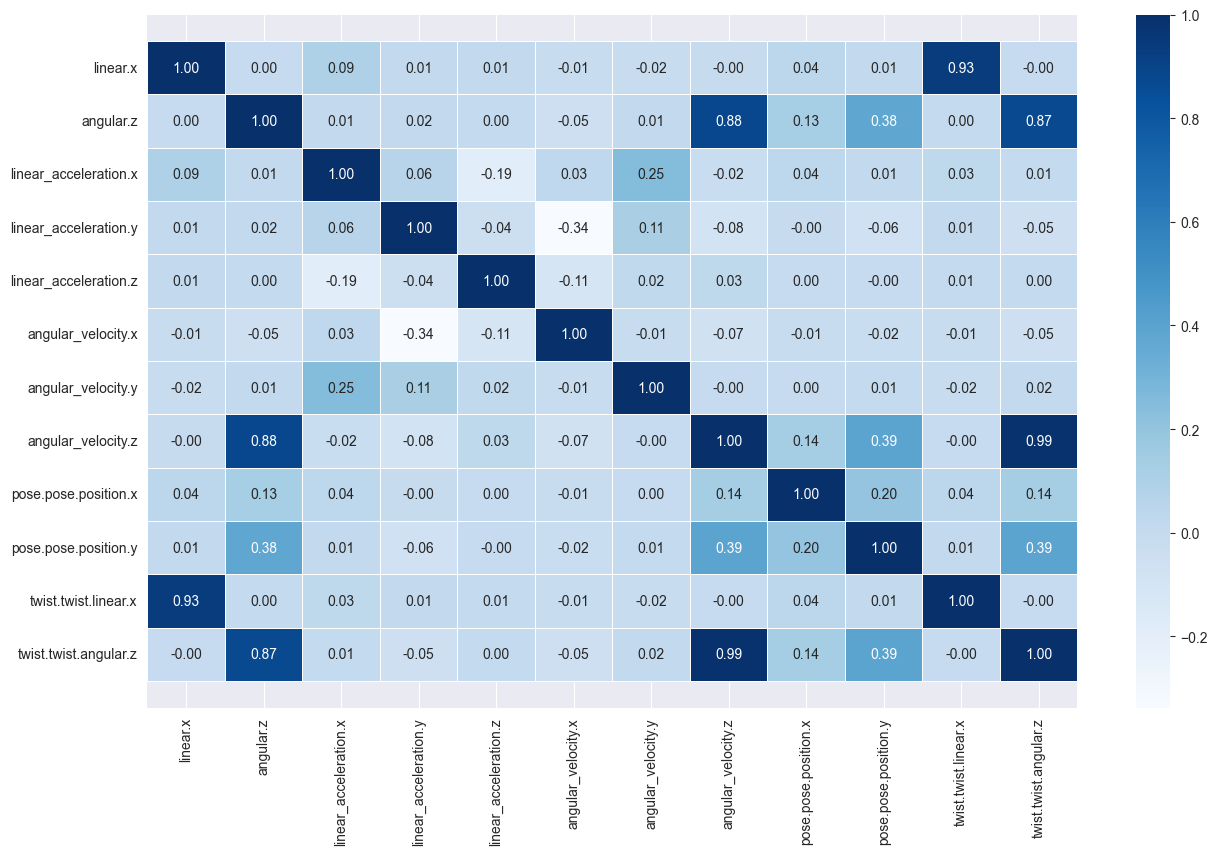

In [18]:
corr_matrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Correlation visualizations

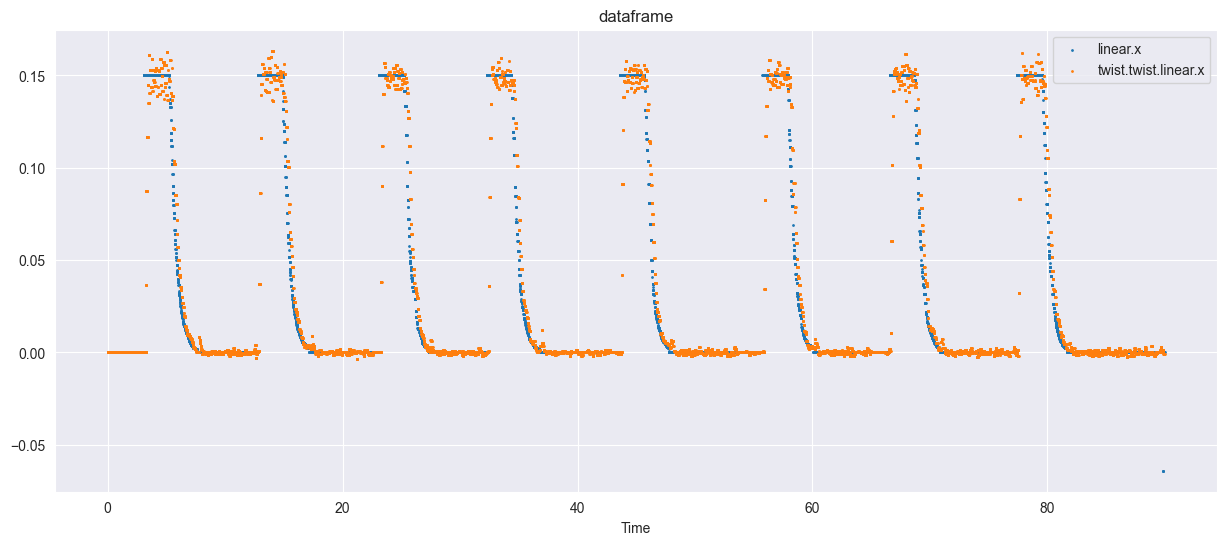

In [19]:
# cmd_vel / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['linear.x', 'twist.twist.linear.x']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

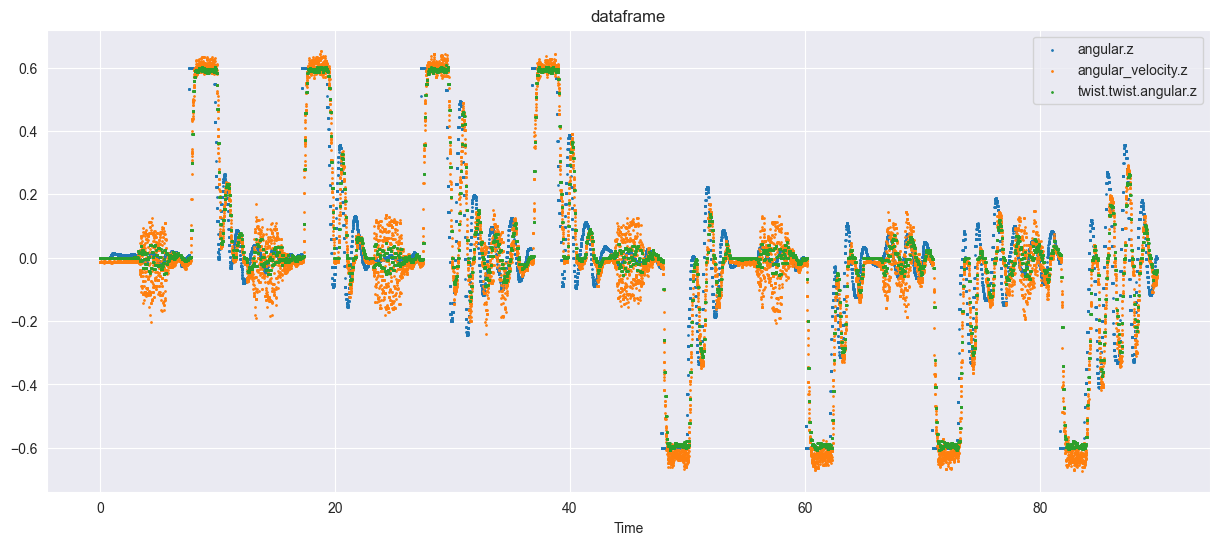

In [20]:
# cmd_vel / imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['angular.z', 'angular_velocity.z', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

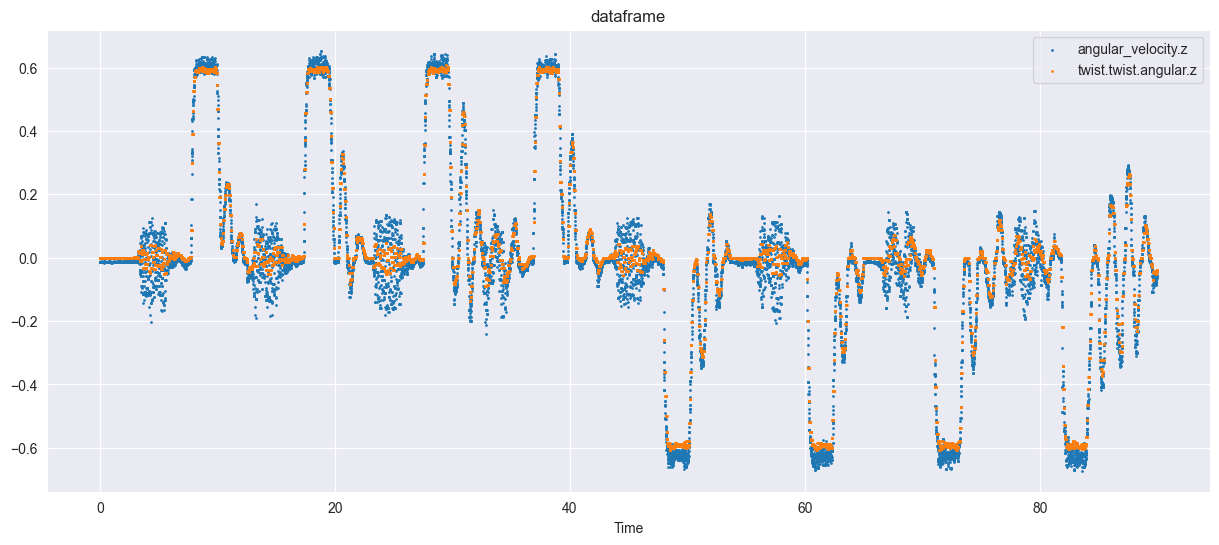

In [21]:
# imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['angular_velocity.z', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

### Target datasets

In [22]:
dataframe_no_odom = dataframe.drop(columns=['pose.pose.position.x', 'pose.pose.position.y', 'twist.twist.linear.x', 'twist.twist.angular.z'])

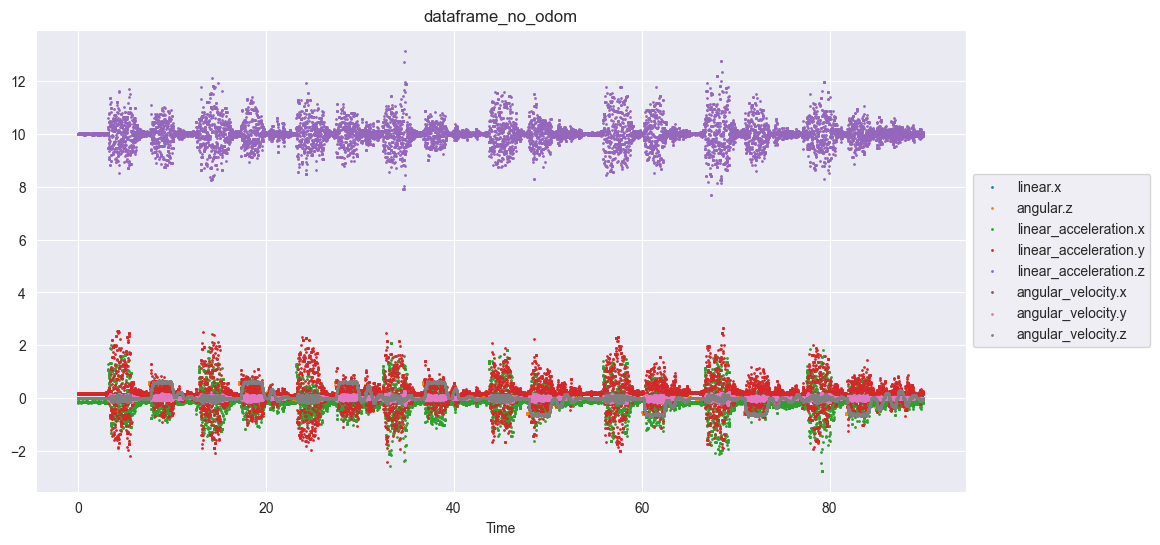

In [23]:
_, ax = plt.subplots(figsize=(15, 6))

for column in dataframe_no_odom.columns:
    ax.scatter(x=dataframe_no_odom.index, y=dataframe_no_odom[column], s=1, label=column)
ax.set_title('dataframe_no_odom')
ax.set_xlabel('Time')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Servo data

In [24]:
servo_data = topic_data['Servo_data']
data = servo_data['values'].tolist()
data = [line.replace(', ', '];[') for line in data]
data = [line.replace('[', '') for line in data]
data = [line.replace(']', '') for line in data]
data = [line.split(sep=';') for line in data]
data = [[yaml.safe_load(line) for line in separate_lines] for separate_lines in data]
columns = ['Power_' + str(idx + 1) for idx in range(4)]
power = pd.DataFrame([[tuple(dictionary.values())[1] * tuple(dictionary.values())[2] for dictionary in line] for line in data], columns=columns)

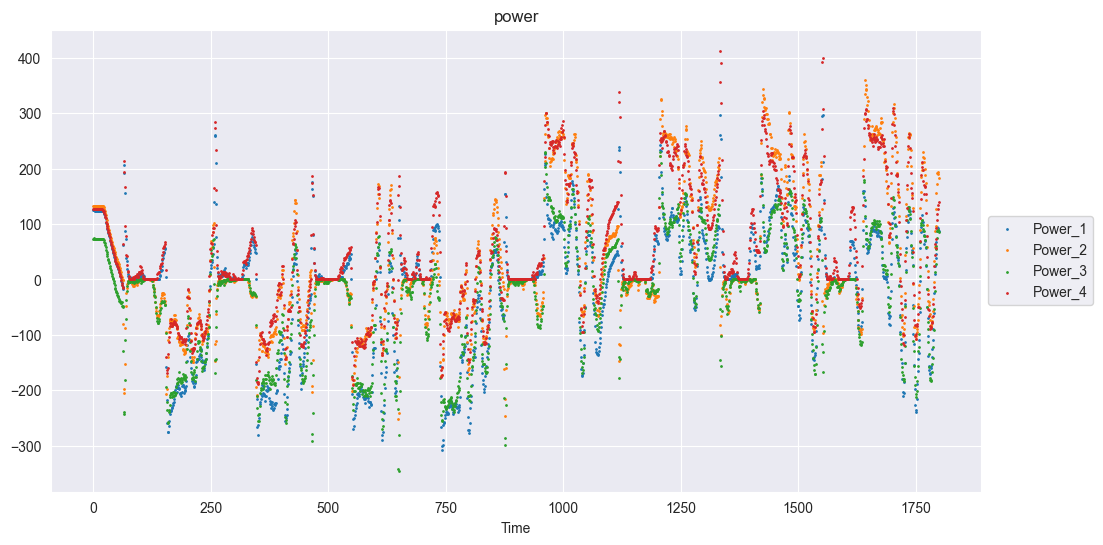

In [25]:
_, ax = plt.subplots(figsize=(15, 6))

for column in power.columns:
    ax.scatter(x=power.index, y=power[column], s=1, label=column)
ax.set_title('power')
ax.set_xlabel('Time')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()